# Wrangle and Analyze Data

In [239]:
# Import python libraries
import pandas as pd
import numpy as np
import requests

## Gathering data

### WeRateDogs enhanced twitter archive
We import the first file related to the WeRateDogs twitter archive into a DataFrame using the code below. Since this file is directly provided to us, we just need to load it using the *read_csv* function.

In [240]:
# Import the WeRateDogs Twitter archive into a DataFrame.
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [241]:
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Tweet image predictions
The second file related to tweet image predictions is downloaded from the udacity server using the requests library and then the corresponding contents are written to a TSV file. This file is then stored in a DataFrame using the *read_csv* function with the tab character specified as the separator.

In [242]:
# Download the tweet image predictions data from udacity servers.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

In [243]:
# Save the downloaded contents to a file
with open('image-predictions.tsv', 'wb') as file:
    file.write(r.content)

In [244]:
# Read the tsv file into a DataFrame.
df_image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Each tweet's json data using Twitter API
The following code is used to create a twitter API object for downloading each tweet's json data.

In [245]:
# Create an API object used to gather twitter data
# import tweepy

# consumer_key = <consumer_key>
# consumer_secret = <consumer_secret>
# access_token = <access_token>
# access_secret = <access_secret>

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

The following code is used to download each tweet's json data by querying each tweet ID from the twitter archive DataFrame created earlier. We note that there are some tweet IDs which are missing in the twitter json data. These are printed in the "**Error:...**" messages in the output. The time taken for gathering tweet json data is also recorded, which is around 30 minutes.

In [246]:
# Get tweet JSON data using tweet ID
# import time
# import json
# start_time = time.time()
# with open('tweet_json.txt', 'w') as file:
#     for i in range(0,df_twitter_archive.shape[0]):
#         sample_tweet_id = df_twitter_archive['tweet_id'][i]
#         try:
#             tweet = api.get_status(sample_tweet_id, tweet_mode='extended')
#         except tweepy.TweepError as e:
#             print("Error: ", e)
#         print(sample_tweet_id)
#         json.dump(tweet._json, file)
#         file.write('\n')
# end_time = time.time()
# print("Time taken for gathering tweet data = ", end_time-start_time, "seconds.")

We extract the tweet ID, retweet count, and favorite count for each tweet in the tweet json data and store it into a DataFrame using the code below.

In [247]:
# Read the JSON data from the file and store into a temporary DataFrame
df_tweet_json_temp = pd.read_json('tweet_json.txt', lines=True)    
df_tweet_json_temp.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",36295,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,7724,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",31289,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5715,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",23564,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3786,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",39580,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,7877,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",37784,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,8503,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [248]:
df_tweet_json_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2356 non-null datetime64[ns]
display_text_range               2356 non-null object
entities                         2356 non-null object
extended_entities                2082 non-null object
favorite_count                   2356 non-null int64
favorited                        2356 non-null bool
full_text                        2356 non-null object
geo                              0 non-null float64
id                               2356 non-null int64
id_str                           2356 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [249]:
# Create a new tweet json DataFrame with tweet ID, retweet count and favorite count.
df_tweet_json = pd.DataFrame(data={'tweet_id':df_tweet_json_temp['id'], 'retweet_count':df_tweet_json_temp['retweet_count'], 'favorite_count':df_tweet_json_temp['favorite_count']})

In [250]:
df_tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7724,36295
1,892177421306343426,5715,31289
2,891815181378084864,3786,23564
3,891689557279858688,7877,39580
4,891327558926688256,8503,37784


## Assessing data

### Visual assessment
We perform a visual assessment of the data by listing each DataFrame downloaded before as shown in the code below. We also note down relevant quality and tidiness issues for each table.

#### WeRateDogs enhanced twitter archive

In [251]:
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


We can see from the above table that the dog stage needs to be a single column with four possible values (doggo, floofer, pupper and puppo) instead of four separate columns. 

In [252]:
df_twitter_archive.text[2335]

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

Inspecting the above record at index 2335, we find that the rating according to the tweet text should be 9/10, but the table above has it stored as 1/2. So we need to cross check the ratings for all records with the corresponding tweet text.

In [253]:
df_twitter_archive.text[22]

"I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba"

The above record at index 22 shows that the name of the dog is missing. However, the table stores the name for this record as "such". There are also some names stored as "a", "an", "the" etc. These entries need to be cleaned.

#### Tweet image predictions

In [254]:
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In the above table we can see that some entries all three columns 'p1_dog', 'p2_dog', 'p3_dog' are **False**. So these predictions are not relevant for our dataset and need to be cleaned.

#### Tweet json data

In [255]:
df_tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7724,36295
1,892177421306343426,5715,31289
2,891815181378084864,3786,23564
3,891689557279858688,7877,39580
4,891327558926688256,8503,37784
5,891087950875897856,2846,19040
6,890971913173991426,1854,11089
7,890729181411237888,17239,61133
8,890609185150312448,3922,26195
9,890240255349198849,6715,29931


We also note that the three tables contain separate pieces of data for each individual tweet where 'tweet_id' column is repeated in all of them. We need to merge these three tables into one according to the rules of tidy data (each observational unit forms a table) and the project motivation.

### Programmatic assessment
We perform programmatic assessment of the three tables using different pandas functions like head, tail, info methods etc. The analysis is shown below.

#### WeRateDogs enhanced twitter data

In [256]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In the cell above, 'tweet_id' is an integer, which should really be a string. 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id' are float64 which should be strings. 'timestamp' and 'retweeted_status_timestamp' are strings, which should be datetime datatypes. There are missing entries for various columns such as 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id' etc. Some columns with missing entries can't be cleaned unless we get the accurate missing information. However, we can clean the 'expanded_urls' column since we know the standard url format for every tweet based on tweet ID.

In [257]:
df_twitter_archive[df_twitter_archive.retweeted_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


The above cell lists the records which are original ratings and not retweets. So all retweets need to be cleaned.

In [258]:
df_twitter_archive.expanded_urls

0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
4       https://twitter.com/dog_rates/status/891327558...
5       https://twitter.com/dog_rates/status/891087950...
6       https://gofundme.com/ydvmve-surgery-for-jax,ht...
7       https://twitter.com/dog_rates/status/890729181...
8       https://twitter.com/dog_rates/status/890609185...
9       https://twitter.com/dog_rates/status/890240255...
10      https://twitter.com/dog_rates/status/890006608...
11      https://twitter.com/dog_rates/status/889880896...
12      https://twitter.com/dog_rates/status/889665388...
13      https://twitter.com/dog_rates/status/889638837...
14      https://twitter.com/dog_rates/status/889531135...
15      https://twitter.com/dog_rates/status/889278841...
16      https://twitter.com/dog_rates/status/888917238...
17      https:

In the above cell, the 'expanded_urls' column entries at indices 6 and 27 do not seem correct. So such entries need to be cleaned by replacing them with the correct url according to the tweet ID.

In [259]:
df_dog_name_value_counts = df_twitter_archive[df_twitter_archive.name != 'None'].name.value_counts()
unknown_dog_names = df_dog_name_value_counts[df_dog_name_value_counts.index.str.islower() == True].index
unknown_dog_names

Index(['a', 'the', 'an', 'very', 'just', 'one', 'quite', 'actually', 'not',
       'mad', 'getting', 'unacceptable', 'infuriating', 'his', 'old',
       'officially', 'light', 'by', 'incredibly', 'this', 'space', 'all',
       'such', 'life', 'my'],
      dtype='object')

The above cell calculates those dog names in the table which are lower case and don't make sense (are not 'None'). The names of these dogs are unknown and all such names need to be set to 'None'.

In [260]:
df_twitter_archive.text[100]

'Here are my favorite #dogsatpollingstations \nMost voted for a more consistent walking schedule and to increase daily pats tenfold. All 13/10 https://t.co/17FVMl4VZ5'

#### Tweet image predictions

In [261]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In the above cell, we see that 'tweet_id' is an integer, which should be a string. Also, there are 2075 entries in the above table, but the enhanced twitter archive table has 2356 entries. So there are missing records in the above table. 

In [262]:
df_image_predictions[(df_image_predictions.p1_dog == False) & (df_image_predictions.p2_dog == False) & (df_image_predictions.p3_dog == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


The above cell lists the entries where none of the three predictions is a dog. So these entries need to be cleaned.

#### Tweet json data

In [263]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
tweet_id          2356 non-null int64
retweet_count     2356 non-null int64
favorite_count    2356 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


In the above cell, 'tweet_id' is an integer which needs to be a string.

In [264]:
df_tweet_json[df_tweet_json.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count
19,888554962724278272,3183,18560
95,874012996292530176,9451,32381
101,872820683541237760,3436,13933
104,872486979161796608,8348,38547
118,870063196459192321,7737,34685
132,867051520902168576,7383,30731
155,862096992088072192,21910,71276
182,857029823797047296,3823,18296
211,852189679701164033,1554,11270
247,845677943972139009,4750,25041


The above cell shows that there are some entries with duplicate tweet IDs which need to be cleaned.

### Quality summary

#### `df_twitter_archive` table
  - Cross check the ratings for all records with the corresponding tweet text and rectify those which are inaccurate.
  - There are some entries where the name of the dog is missing in the tweet text. The name for such entries needs to be set to 'None' instead of 'a', 'an', 'the', 'such', 'quite' etc.
  -  Erroneous datatypes (tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp).
  - Missing entries for various columns ('in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'expanded_urls'). Only 'expanded_urls' column can be cleaned.
  - Some entries are not original ratings and are retweets, as indicated by the 'retweeted_status_id' column.
  - Inaccurate entries in 'expanded_urls' column.
  
#### `df_image_predictions` table
  - Erroneous datatype for 'tweet_id'.
  - Some tweet IDs are missing which are present in the 'df_twitter_archive' table. This can't be cleaned. 
  - Some entries have none of the three predictions as a dog.
  
#### `df_tweet_json` table
  - Erroneous datatype for 'tweet_id'.
  - Duplicate entries for 'tweet_id'.

### Tidiness summary

- The dog stage needs to be a single column instead of four separate columns.
- The three tables need to be merged into one based on tweet ID.

## Cleaning data
The first step is to create copies of all the three tables and work on them for various cleaning operations.

In [265]:
df_twitter_archive_clean = df_twitter_archive.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_tweet_json_clean = df_tweet_json.copy()

In [266]:
df_twitter_archive[df_twitter_archive.rating_denominator != 10].iloc[2].text

'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd'

### Quality

#### Inaccurate ratings in `df_twitter_archive` table

##### Define
Extract the correct ratings by selecting the last match of the regular expression '((?:\d+\.)?\d+)\/(\d+)' from the tweet text of each row. Use the `.apply` function in pandas.

##### Code

In [267]:
import re
def find_correct_rating(text):
    return re.findall('((?:\d+\.)?\d+)\/(\d+)', text)[-1]

accurate_ratings = df_twitter_archive_clean.text.apply(find_correct_rating)
df_twitter_archive_clean['rating_numerator'] = accurate_ratings.apply(lambda x: float(x[0]))
df_twitter_archive_clean['rating_denominator'] = accurate_ratings.apply(lambda x: float(x[1]))

##### Test

In [268]:
df_twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None


In [269]:
df_twitter_archive_clean.iloc[2335]

tweet_id                                                     666287406224695296
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2015-11-16 16:11:11 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is an Albanian 3 1/2 legged  Episcopalian...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/666287406...
rating_numerator                                                              9
rating_denominator                                                           10
name                                    

#### Setting missing dog names to 'None' in the `df_twitter_archive` table

##### Define
Create a function which takes the dog name as input and returns 'None' if it matches any entry in the list unknown_dog_names. Use the `.apply` function in pandas.

##### Code

In [270]:
def return_missing_dog_names(name):
    if name in unknown_dog_names:
        return 'None'
    else:
        return name

dog_names = df_twitter_archive_clean.name.apply(return_missing_dog_names)
df_twitter_archive_clean['name'] = dog_names

##### Test

In [271]:
sum([item in unknown_dog_names for item in df_twitter_archive_clean.name.value_counts().index.tolist()])

0

#### Erroneous datatypes (tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp,  retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) in the three tables.

##### Define
Convert 'tweet_id' to string datatype and timestamp to datetime datatype.

##### Code

In [272]:
df_twitter_archive_clean.tweet_id = df_twitter_archive_clean.tweet_id.astype('object')
df_twitter_archive_clean.in_reply_to_status_id = df_twitter_archive_clean.in_reply_to_status_id.astype('object')
df_twitter_archive_clean.in_reply_to_user_id = df_twitter_archive_clean.in_reply_to_user_id.astype('object')
df_twitter_archive_clean.retweeted_status_id = df_twitter_archive_clean.retweeted_status_id.astype('object')
df_twitter_archive_clean.retweeted_status_user_id = df_twitter_archive_clean.retweeted_status_user_id.astype('object')
df_twitter_archive_clean.timestamp = pd.to_datetime(df_twitter_archive_clean.timestamp)
df_twitter_archive_clean.retweeted_status_timestamp = pd.to_datetime(df_twitter_archive_clean.retweeted_status_timestamp)
df_image_predictions_clean.tweet_id = df_image_predictions_clean.tweet_id.astype('object')
df_tweet_json_clean.tweet_id = df_tweet_json_clean.tweet_id.astype('object')

##### Test

In [273]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetim

In [274]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [275]:
df_tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
tweet_id          2356 non-null object
retweet_count     2356 non-null int64
favorite_count    2356 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


#### Fixing incorrect and missing entries in the 'expanded_urls' column in the `df_twitter_archive` table

##### Define
Set each entry in the column by concatenating the strings 'https://twitter.com/dog_rates/status/', tweet ID, and '/photo/1'.

##### Code

In [276]:
df_twitter_archive_clean.expanded_urls = 'https://twitter.com/dog_rates/status/' + df_twitter_archive_clean.tweet_id.astype(str) + '/photo/1'

##### Test

In [277]:
df_twitter_archive_clean.expanded_urls

0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
4       https://twitter.com/dog_rates/status/891327558...
5       https://twitter.com/dog_rates/status/891087950...
6       https://twitter.com/dog_rates/status/890971913...
7       https://twitter.com/dog_rates/status/890729181...
8       https://twitter.com/dog_rates/status/890609185...
9       https://twitter.com/dog_rates/status/890240255...
10      https://twitter.com/dog_rates/status/890006608...
11      https://twitter.com/dog_rates/status/889880896...
12      https://twitter.com/dog_rates/status/889665388...
13      https://twitter.com/dog_rates/status/889638837...
14      https://twitter.com/dog_rates/status/889531135...
15      https://twitter.com/dog_rates/status/889278841...
16      https://twitter.com/dog_rates/status/888917238...
17      https:

#### Remove entries which are retweets from the `df_twitter_archive` table

##### Define
Keep the entries where 'retweeted_status_id' is NaN using the isnull() function.

##### Code

In [278]:
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.retweeted_status_id.isnull()]

##### Test

In [279]:
sum(df_twitter_archive_clean.retweeted_status_id.notnull())

0

In [280]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2175 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns

#### Remove those entries from the `df_image_predictions` table where none of the three predictions is a dog

##### Define
Calculate those indices where none of the three predictions is a dog and then remove them using the drop function.

##### Code

In [281]:
indexNames = df_image_predictions_clean[(df_image_predictions_clean.p1_dog == False) & (df_image_predictions_clean.p2_dog == False) & (df_image_predictions_clean.p3_dog == False)].index
df_image_predictions_clean.drop(indexNames, inplace=True)

##### Test

In [282]:
df_image_predictions_clean[(df_image_predictions_clean.p1_dog == False) & (df_image_predictions_clean.p2_dog == False) & (df_image_predictions_clean.p3_dog == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [283]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1751 non-null object
jpg_url     1751 non-null object
img_num     1751 non-null int64
p1          1751 non-null object
p1_conf     1751 non-null float64
p1_dog      1751 non-null bool
p2          1751 non-null object
p2_conf     1751 non-null float64
p2_dog      1751 non-null bool
p3          1751 non-null object
p3_conf     1751 non-null float64
p3_dog      1751 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 141.9+ KB


#### Remove duplicate entries in the `df_tweet_json` table.

##### Define
Remove duplicates using the drop_duplicates() function.

##### Code

In [284]:
df_tweet_json_clean.drop_duplicates(inplace=True)

##### Test

In [285]:
sum(df_tweet_json_clean.duplicated())

0

### Tidiness

#### Create one column for dog stage

##### Define
Combine the four columns for dog stages into a column with a list of four stages and then drop the 'None' values from that list. Convert the list to a string with multiple stages separated with commas. Drop the four columns 'doggo', 'floofer', 'pupper' and 'puppo' in the second step.

##### Code

In [286]:
df_twitter_archive_clean['stage'] = df_twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].values.tolist()
df_twitter_archive_clean['stage'] = df_twitter_archive_clean['stage'].apply(lambda x: [val for val in x if val != 'None'])
df_twitter_archive_clean['stage'] = df_twitter_archive_clean['stage'].apply(', '.join)
df_twitter_archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

##### Test

In [287]:
df_twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890971913...,13.0,10.0,Jax,
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo


#### Merge the three tables into one based on tweet ID

##### Define
Use the merge function to join the three DataFrames based on tweet ID. Remove the null columns 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp' using the drop function. Save the resulting DataFrame to a csv file which will be the final output of the cleaning process.

##### Code

In [288]:
df_temp = pd.merge(df_twitter_archive_clean, df_image_predictions_clean, on='tweet_id')
df_twitter_archive_master = pd.merge(df_temp, df_tweet_json_clean, on='tweet_id')
df_twitter_archive_master.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

##### Test

In [289]:
df_twitter_archive_master

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5715,31289
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3786,23564
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7877,39580
3,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8503,37784
4,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,2846,19040
5,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,https://twitter.com/dog_rates/status/890971913...,13.0,10.0,Jax,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,1854,11089
6,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,17239,61133
7,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,3922,26195
8,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,6715,29931
9,890006608113172480,NaN,NaN,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13.0,10.0,Koda,...,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True,6700,28817


In [290]:
df_twitter_archive_master.to_csv('twitter_archive_master.csv')

In [291]:
df_twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1679 entries, 0 to 1678
Data columns (total 24 columns):
tweet_id                 1679 non-null object
in_reply_to_status_id    20 non-null object
in_reply_to_user_id      20 non-null object
timestamp                1679 non-null datetime64[ns]
source                   1679 non-null object
text                     1679 non-null object
expanded_urls            1679 non-null object
rating_numerator         1679 non-null float64
rating_denominator       1679 non-null float64
name                     1679 non-null object
stage                    1679 non-null object
jpg_url                  1679 non-null object
img_num                  1679 non-null int64
p1                       1679 non-null object
p1_conf                  1679 non-null float64
p1_dog                   1679 non-null bool
p2                       1679 non-null object
p2_conf                  1679 non-null float64
p2_dog                   1679 non-null bool
p3              

## Analyzing and visualizing data

We have created a cleaned dataset and stored it in a DataFrame and a csv file. Now we move to the next step of acting on wrangled data and analyzing it. Since some ratings have different denominators, we create a new normalized rating metric for easy comparison of the different entries as follows.

In [304]:
df_twitter_archive_master['rating_normalized'] = df_twitter_archive_master['rating_numerator']/df_twitter_archive_master['rating_denominator']
df_twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1679 entries, 0 to 1678
Data columns (total 25 columns):
tweet_id                 1679 non-null object
in_reply_to_status_id    20 non-null object
in_reply_to_user_id      20 non-null object
timestamp                1679 non-null datetime64[ns]
source                   1679 non-null object
text                     1679 non-null object
expanded_urls            1679 non-null object
rating_numerator         1679 non-null float64
rating_denominator       1679 non-null float64
name                     1679 non-null object
stage                    1679 non-null object
jpg_url                  1679 non-null object
img_num                  1679 non-null int64
p1                       1679 non-null object
p1_conf                  1679 non-null float64
p1_dog                   1679 non-null bool
p2                       1679 non-null object
p2_conf                  1679 non-null float64
p2_dog                   1679 non-null bool
p3              

In [305]:
df_twitter_archive_master.groupby('stage')['rating_normalized'].describe()

,count,mean,std,min,25%,50%,75%,max
stage,,,,,,,,
,1420.0,1.075760,0.196188,0.0,1.000,1.1,1.2,3.428571
doggo,53.0,1.190566,0.139041,0.8,1.100,1.2,1.3,1.400000
"doggo, floofer",1.0,1.100000,NaN,1.1,1.100,1.1,1.1,1.100000
"doggo, pupper",8.0,1.112500,0.253194,0.5,1.175,1.2,1.2,1.300000
"doggo, puppo",1.0,1.300000,NaN,1.3,1.300,1.3,1.3,1.300000
floofer,7.0,1.200000,0.115470,1.0,1.150,1.2,1.3,1.300000
pupper,168.0,1.084685,0.148472,0.4,1.000,1.1,1.2,1.400000
puppo,21.0,1.195238,0.132198,0.9,1.100,1.2,1.3,1.400000


The above cell describes the statistics of the normalized rating for different dog stages. The mean normalized rating is plotted in the bar chart below.

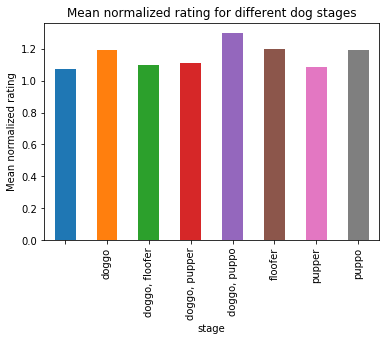

In [306]:
import matplotlib.pyplot as plt
%matplotlib inline
df_twitter_archive_master.groupby('stage')['rating_normalized'].mean().plot(kind='bar')
plt.ylabel('Mean normalized rating')
plt.title('Mean normalized rating for different dog stages')
plt.savefig('mean_normalized_rating.png', bbox_inches='tight')

In [307]:
df_p1_dogs = df_twitter_archive_master.query("p1_dog == True")
df_p1_dogs.groupby('stage')['p1_conf'].describe()

,count,mean,std,min,25%,50%,75%,max
stage,,,,,,,,
,1243.0,0.607883,0.262065,0.044333,0.381739,0.609860,0.848882,0.999956
doggo,47.0,0.565296,0.246259,0.113992,0.415790,0.560699,0.742386,0.999715
"doggo, floofer",1.0,0.354733,NaN,0.354733,0.354733,0.354733,0.354733,0.354733
"doggo, pupper",8.0,0.815432,0.175086,0.426183,0.800831,0.856051,0.909252,0.985876
"doggo, puppo",1.0,0.321676,NaN,0.321676,0.321676,0.321676,0.321676,0.321676
floofer,7.0,0.609204,0.344807,0.155144,0.380214,0.457356,0.951751,0.987997
pupper,144.0,0.659217,0.244822,0.100499,0.440302,0.724590,0.859403,0.999828
puppo,19.0,0.708338,0.222429,0.196015,0.563705,0.734684,0.910517,0.992339


The above cell describes the statistics of the \#1 prediction confidence for different dog stages where the prediction is actually a dog. The mean prediction confidence is plotted in the bar chart below.

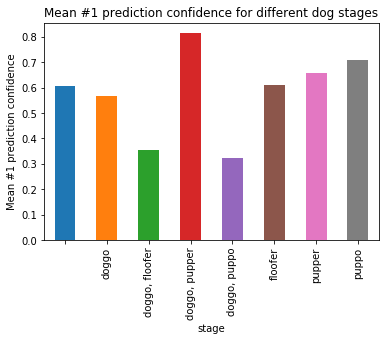

In [308]:
df_p1_dogs.groupby('stage')['p1_conf'].mean().plot(kind='bar')
plt.ylabel('Mean #1 prediction confidence')
plt.title('Mean #1 prediction confidence for different dog stages')
plt.savefig('mean_prediction_confidence.png', bbox_inches='tight')

In [309]:
df_twitter_archive_master.groupby('stage')['retweet_count'].describe()

,count,mean,std,min,25%,50%,75%,max
stage,,,,,,,,
,1420.0,2321.547183,3694.743806,11.0,523.75,1206.0,2764.75,56899.0
doggo,53.0,6540.018868,13763.825457,635.0,1752.00,2506.0,4419.00,78047.0
"doggo, floofer",1.0,3058.000000,NaN,3058.0,3058.00,3058.0,3058.00,3058.0
"doggo, pupper",8.0,3942.375000,5242.835763,1113.0,1804.25,2208.0,2833.50,16819.0
"doggo, puppo",1.0,17385.000000,NaN,17385.0,17385.00,17385.0,17385.00,17385.0
floofer,7.0,4365.714286,5368.642961,440.0,1630.50,2879.0,3920.00,16140.0
pupper,168.0,2146.464286,3450.375980,85.0,610.25,1051.5,2158.25,33046.0
puppo,21.0,5765.619048,9625.282107,622.0,1488.00,2690.0,4804.00,43972.0


The above cell describes the statistics of the retweet count for different dog stages. The mean retweet count is plotted in the bar chart below.

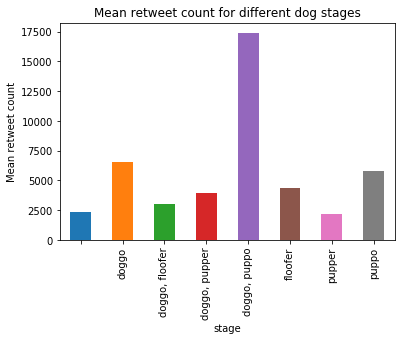

In [310]:
df_twitter_archive_master.groupby('stage')['retweet_count'].mean().plot(kind='bar')
plt.ylabel('Mean retweet count')
plt.title('Mean retweet count for different dog stages')
plt.savefig('mean_retweet_count.png', bbox_inches='tight')

In [311]:
df_twitter_archive_master.groupby('stage')['favorite_count'].describe()

,count,mean,std,min,25%,50%,75%,max
stage,,,,,,,,
,1420.0,8141.504225,11130.331113,72.0,1728.25,3804.0,10298.50,120948.0
doggo,53.0,19177.830189,27671.787178,2339.0,7091.00,10772.0,18624.00,156586.0
"doggo, floofer",1.0,15879.000000,NaN,15879.0,15879.00,15879.0,15879.00,15879.0
"doggo, pupper",8.0,13139.125000,15063.989942,4419.0,6695.75,8628.5,9857.25,50071.0
"doggo, puppo",1.0,44489.000000,NaN,44489.0,44489.00,44489.0,44489.00,44489.0
floofer,7.0,12088.428571,10310.897663,2071.0,4597.50,10247.0,16362.50,30381.0
pupper,168.0,6993.994048,11476.949071,630.0,2223.00,3002.0,6783.00,116664.0
puppo,21.0,20943.476190,29265.752187,2970.0,6385.00,10472.0,17956.00,133348.0


The above cell describes the statistics of the favorite count for different dog stages. The mean favorite count is plotted in the bar chart below.

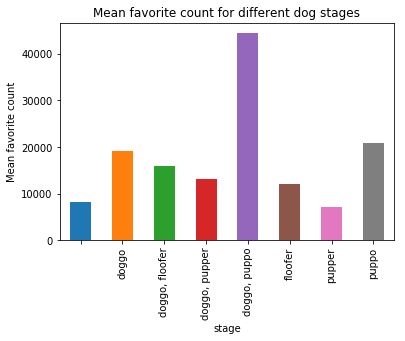

In [312]:
df_twitter_archive_master.groupby('stage')['favorite_count'].mean().plot(kind='bar')
plt.ylabel('Mean favorite count')
plt.title('Mean favorite count for different dog stages')
plt.savefig('mean_favorite_count.png', bbox_inches='tight')

In [313]:
def correlation(x, y):
    
    x_standard = (x - x.mean())/x.std(ddof=0)
    y_standard = (y - y.mean())/y.std(ddof=0)
    prod = x_standard*y_standard
    
    return prod.mean()

The above code defines a function to compute the correlation coefficient between two pandas series x and y.

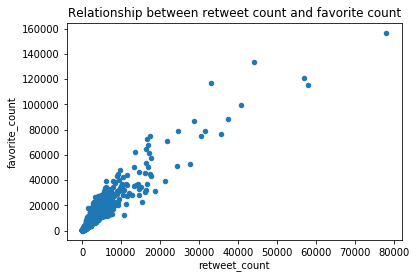

In [314]:
df_twitter_archive_master.plot(x='retweet_count', y='favorite_count', kind='scatter')
plt.title('Relationship between retweet count and favorite count')
plt.savefig('retweet_count_favorite_count_scatter.png', bbox_inches='tight')

The above scatter plot shows the relationship between retweet count and favorite count. We can see that they have a linear relationship, which is confirmed by the value of correlation coefficient (Pearson's r) in the cell below.

In [315]:
print("Pearson's r between retweet count and favorite count = {}".format(correlation(df_twitter_archive_master['retweet_count'], df_twitter_archive_master['favorite_count'])))

Pearson's r between retweet count and favorite count = 0.9309333468626146


### Insights
The above statistics and visualizations give us the following information:
 - We don't know the stage of most of the entries (1420).
 - Most of the tweets with a single image are for dogs in the stage 'pupper'(168).
 - For tweets having a single image with one dog stage, the 'floofer' stage has the highest mean normalized rating.
 - For tweets having a single image with one dog stage, the 'puppo' stage has the highest mean \#1 prediction confidence, followed by 'pupper', 'floofer' and 'doggo'.
 - For tweets having more than one image, the 'doggo, pupper' stage has the highest mean \#1 prediction confidence.
 - For tweets having a single image with one dog stage, the 'doggo' stage has the highest mean retweet count, followed by 'puppo', 'floofer' and 'pupper'.
 - For tweets having more than one image, the 'doggo, puppo' stage has the highest mean retweet count.
 - For tweets having a single image with one dog stage, the 'puppo' stage has the highest mean favorite count, followed by 'doggo', 'floofer' and 'pupper'.
 - For tweets having more than one image, the 'doggo, puppo' stage has the highest mean favorite count.
 - The retweet count and favorite count have a positive linear relationship, which is evident from both the scatter plot and the correlation coefficient value of 0.93.

## References

 - https://www.kaggle.com/rahulpatel11315/read-data-from-tsv-file-using-pandas-dataframe
 - https://stackoverflow.com/questions/52077085/how-to-parse-json-string-to-tweepy-status-object
 - https://stackoverflow.com/questions/7370801/measure-time-elapsed-in-python
 - http://docs.tweepy.org/en/v3.5.0/api.html#tweepy-error-exceptions